In [1]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# input data

In [4]:
################
# THESE ARE THE ONLY PARAMETERS TO CHANGE



path = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/"

path_to_folder_with_filenames = path+"08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/budding yeast abp1gfp/"


# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"/08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/"
file = 'all tracks.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

excludeTheFirstNFrames = 5

# determine alignment method
#alignmentMethod = 'inflectionPoint'

alignmentMethod = 'intensity'
align_intensity_threshold = 0.5 # 50% intensity alignment

################


outputpath = path_to_all_tracks_data

# Get all the good fileIDs from the folder

In [5]:


from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_to_folder_with_filenames) if isfile(join(path_to_folder_with_filenames, f))]
#print(onlyfiles)


goodTrajectoryIDs = []
for filename in onlyfiles:
    if (filename != '.DS_Store'):
        number = int((filename.replace('[Trajectory number ','')).replace('].tif',''))
        print(filename,",",number)
        goodTrajectoryIDs.append(number)
print(goodTrajectoryIDs)   

[Trajectory number 1558].tif , 1558
[Trajectory number 772].tif , 772
[Trajectory number 590].tif , 590
[Trajectory number 2400].tif , 2400
[Trajectory number 2206].tif , 2206
[Trajectory number 548].tif , 548
[Trajectory number 1518].tif , 1518
[Trajectory number 1522].tif , 1522
[Trajectory number 533].tif , 533
[Trajectory number 1084].tif , 1084
[Trajectory number 447].tif , 447
[Trajectory number 164].tif , 164
[Trajectory number 2277].tif , 2277
[Trajectory number 718].tif , 718
[Trajectory number 780].tif , 780
[Trajectory number 893].tif , 893
[Trajectory number 1894].tif , 1894
[Trajectory number 1507].tif , 1507
[Trajectory number 994].tif , 994
[Trajectory number 1767].tif , 1767
[Trajectory number 223].tif , 223
[Trajectory number 1232].tif , 1232
[Trajectory number 1766].tif , 1766
[Trajectory number 444].tif , 444
[Trajectory number 405].tif , 405
[Trajectory number 662].tif , 662
[Trajectory number 623].tif , 623
[Trajectory number 988].tif , 988
[Trajectory number 2317]

# read data

In [6]:
alldata = pd.read_csv(path_to_all_tracks_data+file)
alldata[0:5]

,,Trajectory,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore
0,1,1,0,749.93463,14.50130,0,6.04244,2.23985,6.11717,18.71667,62.14309,0.00501
1,2,1,1,750.13904,14.80274,0,6.23375,2.19954,5.91302,17.78586,57.91466,0.00516
2,3,1,2,749.97839,15.16021,0,6.34022,2.30812,6.50601,20.58775,70.81566,0.00915
3,4,1,3,750.13501,14.95119,0,6.21997,2.34391,6.74435,21.85797,77.11279,0.00769
4,5,1,4,749.99530,15.20649,0,6.03222,2.24832,6.14033,18.74739,62.03238,0.00564


# do it for multiple tracks at once

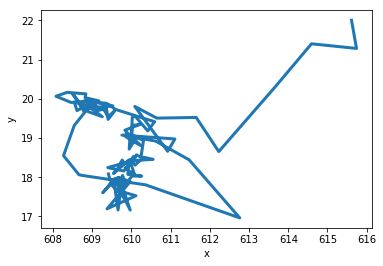

109
            Trajectory  Frame          x         y  z        m0       m1  \
5    61389        1558    277  609.41571  18.08413  0   3.15012  2.22965   
6    61390        1558    278  609.45734  17.92807  0   3.20719  2.06226   
7    61391        1558    279  609.69641  17.98717  0   3.35929  2.31276   
8    61392        1558    280  609.96985  17.16224  0   3.50390  2.33276   
9    61393        1558    281  609.61487  17.87797  0   3.62433  2.08943   
10   61394        1558    282  609.86285  17.79932  0   4.39343  2.09372   
11   61395        1558    283  609.77545  18.04553  0   5.07298  2.20866   
12   61396        1558    284  609.66022  17.16596  0   4.63724  2.09785   
13   61397        1558    285  609.55029  17.93959  0   4.76013  2.25507   
14   61398        1558    286  609.26868  17.60291  0   4.42681  2.28459   
15   61399        1558    287  609.59692  17.96092  0   5.13147  2.14038   
16   61400        1558    288  609.68408  17.70814  0   4.23161  2.33906   
17   614

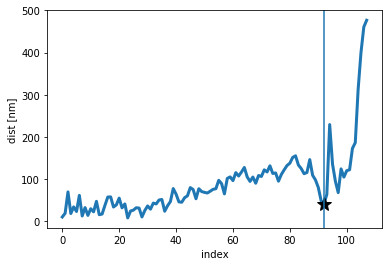

inflectionPoint Frame: 364
inflectionPoint Time[s]: 49.868
inflectionPoint Intensity: 14.73471


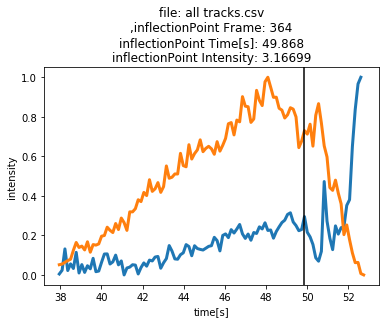

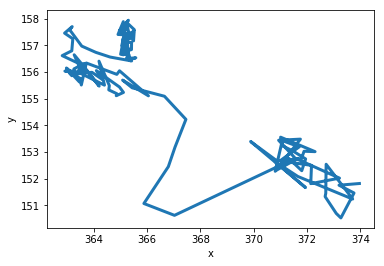

145
            Trajectory  Frame          x          y  z        m0       m1  \
5    35994         772    134  365.04523  157.49841  0   4.49495  1.95679   
6    35995         772    135  365.19931  157.76453  0   3.82106  1.96383   
7    35996         772    136  365.04483  157.46399  0   4.47390  2.11684   
8    35997         772    137  365.29138  157.75299  0   5.48656  2.06072   
9    35998         772    138  365.17862  157.56224  0   5.06929  2.13847   
10   35999         772    139  365.05569  156.99377  0   5.36080  2.07888   
11   36000         772    140  365.52548  157.58632  0   5.73779  2.06935   
12   36001         772    141  365.23053  157.86507  0   5.89824  2.09980   
13   36002         772    142  365.32794  157.42950  0   6.17100  2.04370   
14   36003         772    143  365.49567  157.16832  0   6.42453  2.10993   
15   36004         772    144  365.52069  157.53549  0   7.41015  2.12010   
16   36005         772    145  365.45718  157.47610  0   6.77122  1.9786

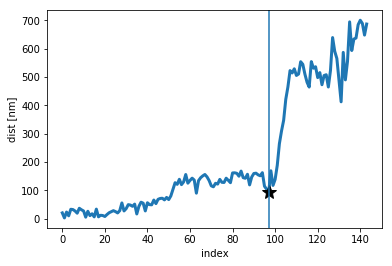

inflectionPoint Frame: 226
inflectionPoint Time[s]: 30.962000000000003
inflectionPoint Intensity: 9.57054


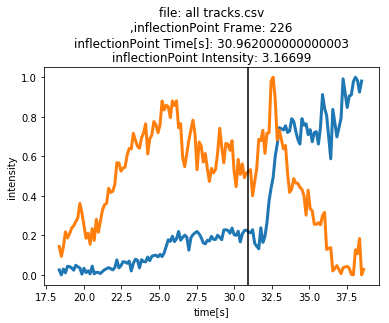

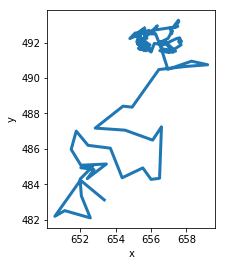

127
            Trajectory  Frame          x          y  z        m0       m1  \
5    28667         590     95  655.62439  492.82605  0   4.74577  2.24263   
6    28668         590     96  655.04010  492.41101  0   4.25605  2.24510   
7    28669         590     97  655.39899  492.25681  0   3.47937  2.15581   
8    28670         590     98  655.94104  491.86658  0   5.43147  2.31816   
9    28671         590     99  655.39545  491.93893  0   5.63329  2.27856   
10   28672         590    100  655.19409  492.03546  0   5.06146  2.32621   
11   28673         590    101  655.35382  491.82602  0   4.83331  2.26949   
12   28674         590    102  655.24194  492.19360  0   5.98766  2.19120   
13   28675         590    103  655.38757  492.42252  0   5.44092  2.14918   
14   28676         590    104  655.50977  491.85226  0   6.02014  2.28646   
15   28677         590    105  655.31268  492.25281  0   6.62606  2.30976   
16   28678         590    106  655.32336  492.00476  0   5.93726  2.2794

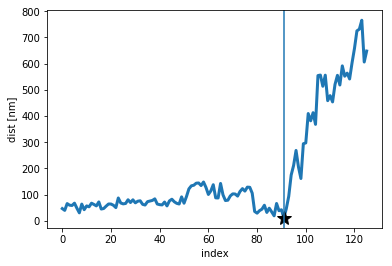

inflectionPoint Frame: 181
inflectionPoint Time[s]: 24.797
inflectionPoint Intensity: 8.48023


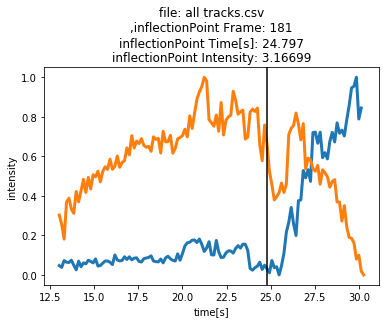

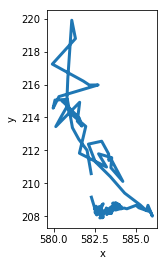

110
            Trajectory  Frame          x          y  z        m0       m1  \
5    85614        2400    412  582.29895  209.16238  0   3.39067  2.08365   
6    85615        2400    413  582.62714  208.08394  0   3.98971  2.34391   
7    85616        2400    414  582.52032  208.23885  0   4.67842  2.21138   
8    85617        2400    415  582.58362  208.61201  0   6.37295  2.08068   
9    85618        2400    416  582.48236  208.47662  0   6.77127  2.13287   
10   85619        2400    417  582.64880  208.38098  0   6.58521  2.00754   
11   85620        2400    418  583.01624  208.76225  0   6.24783  2.42464   
12   85621        2400    419  582.72736  208.12239  0   8.10808  2.08592   
13   85622        2400    420  582.74182  208.57970  0   7.88384  2.11175   
14   85623        2400    421  582.81146  208.26436  0   8.22113  2.05331   
15   85624        2400    422  582.92798  207.99387  0   9.14156  2.26703   
16   85625        2400    423  582.81207  207.90341  0   8.72107  2.2777

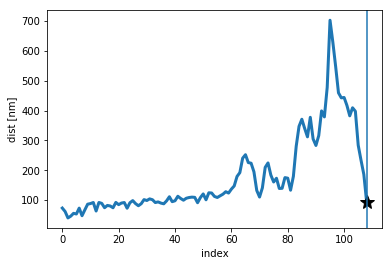

inflectionPoint Frame: 516
inflectionPoint Time[s]: 70.69200000000001
inflectionPoint Intensity: 7.91395


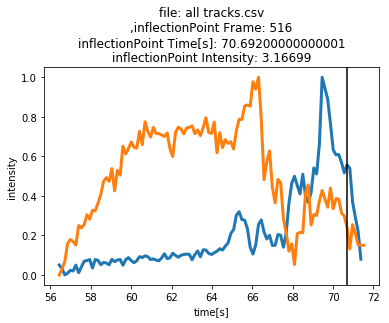

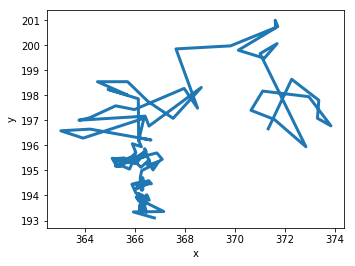

139
            Trajectory  Frame          x          y  z        m0       m1  \
5    80984        2206    382  366.78464  193.10469  0   3.30576  2.07432   
6    80985        2206    383  365.94498  193.34337  0   4.80225  2.30406   
7    80986        2206    384  367.15872  193.35997  0   3.65769  2.18556   
8    80987        2206    385  366.41122  193.73097  0   3.63674  2.21212   
9    80988        2206    386  366.29666  193.51463  0   4.77970  2.11461   
10   80989        2206    387  366.28391  194.02734  0   5.64227  2.14557   
11   80990        2206    388  366.31549  193.81529  0   6.09286  2.22182   
12   80991        2206    389  366.25424  193.58734  0   5.72262  2.16883   
13   80992        2206    390  366.18582  193.33995  0   5.95098  2.09759   
14   80993        2206    391  366.19217  193.61067  0   5.70962  2.19501   
15   80994        2206    392  366.43185  193.36279  0   6.00919  2.15641   
16   80995        2206    393  366.38110  193.50153  0   8.09947  2.2114

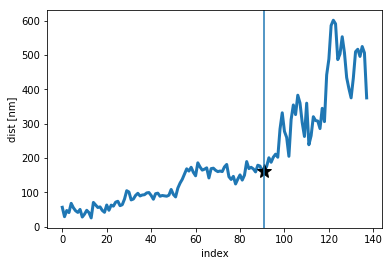

inflectionPoint Frame: 468
inflectionPoint Time[s]: 64.116
inflectionPoint Intensity: 15.552370000000002


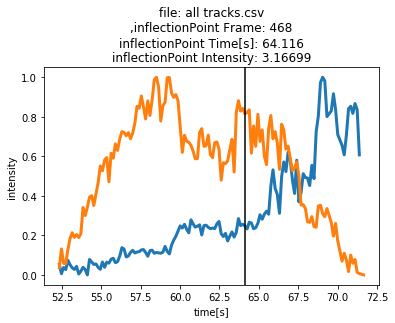

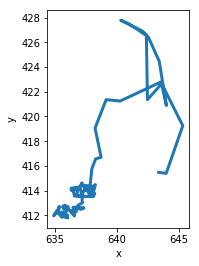

136
            Trajectory  Frame          x          y  z        m0       m1  \
5    27553         548     85  635.45221  412.09924  0   3.87628  2.06586   
6    27554         548     86  635.29486  412.27545  0   4.41108  2.14153   
7    27555         548     87  635.18024  412.30515  0   4.25420  2.03283   
8    27556         548     88  635.34937  412.73535  0   4.96921  2.41648   
9    27557         548     89  635.29767  412.38156  0   6.08165  2.17692   
10   27558         548     90  634.89264  411.97708  0   6.12433  2.25074   
11   27559         548     91  635.13031  412.36273  0   6.93916  2.25545   
12   27560         548     92  635.29413  412.34973  0   7.21692  2.11406   
13   27561         548     93  635.21136  412.23755  0   7.95689  2.18015   
14   27562         548     94  635.59369  411.84900  0   7.70140  2.14469   
15   27563         548     95  635.38586  412.14368  0   8.39244  2.11210   
16   27564         548     96  635.64771  412.29691  0   8.32448  2.1954

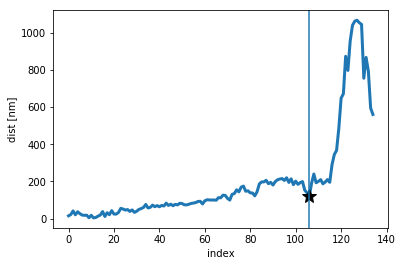

inflectionPoint Frame: 186
inflectionPoint Time[s]: 25.482000000000003
inflectionPoint Intensity: 16.67523


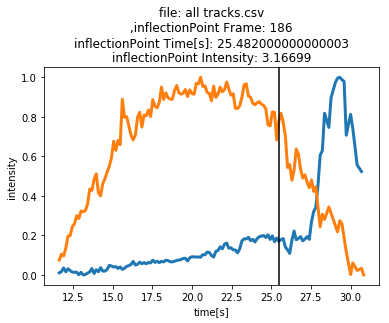

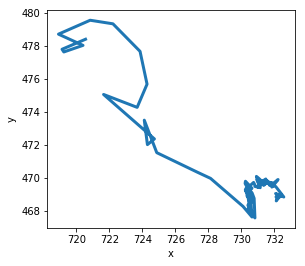

115
            Trajectory  Frame          x          y  z        m0       m1  \
5    59853        1518    269  732.18500  468.82147  0   4.66805  2.24625   
6    59854        1518    270  732.12427  468.60681  0   4.88761  2.23760   
7    59855        1518    271  732.43280  469.00403  0   6.03261  2.25528   
8    59856        1518    272  732.10931  468.84924  0   6.03950  2.06511   
9    59857        1518    273  732.36597  468.86111  0   5.81633  2.12313   
10   59858        1518    274  732.08441  469.05307  0   7.09102  2.20979   
11   59859        1518    275  732.23248  468.99600  0   6.37124  2.25133   
12   59860        1518    276  732.58270  468.84213  0   7.26749  2.19551   
13   59861        1518    277  732.08862  469.48358  0   8.64415  2.26129   
14   59862        1518    278  731.71423  469.55844  0   9.64055  2.07670   
15   59863        1518    279  732.01868  469.62741  0  10.08785  2.18083   
16   59864        1518    280  732.23523  469.90225  0   9.59505  2.1563

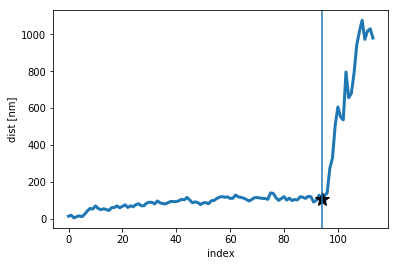

inflectionPoint Frame: 358
inflectionPoint Time[s]: 49.04600000000001
inflectionPoint Intensity: 15.894829999999999


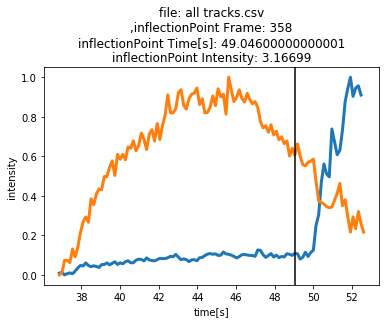

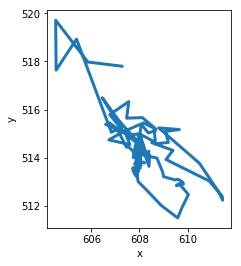

125
            Trajectory  Frame          x          y  z        m0       m1  \
5    59989        1522    270  608.41498  514.09662  0   2.84424  2.23716   
6    59990        1522    271  608.39539  513.63873  0   3.50965  2.17491   
7    59991        1522    272  608.19574  514.21863  0   4.03308  2.12035   
8    59992        1522    273  608.24457  514.09625  0   4.41871  2.21299   
9    59993        1522    274  608.38861  514.27075  0   5.42775  2.44607   
10   59994        1522    275  608.35370  513.92798  0   6.08066  2.33788   
11   59995        1522    276  608.15662  514.53241  0   6.45598  2.18636   
12   59996        1522    277  608.01331  514.41589  0   6.31512  2.25467   
13   59997        1522    278  608.12073  514.49658  0   6.73909  2.18807   
14   59998        1522    279  608.12878  514.59656  0   7.20787  2.11207   
15   59999        1522    280  608.02869  514.99670  0   6.70172  2.35102   
16   60000        1522    281  607.86151  514.50049  0   7.10134  2.3016

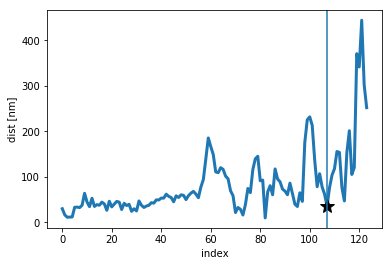

inflectionPoint Frame: 372
inflectionPoint Time[s]: 50.964000000000006
inflectionPoint Intensity: 14.99779


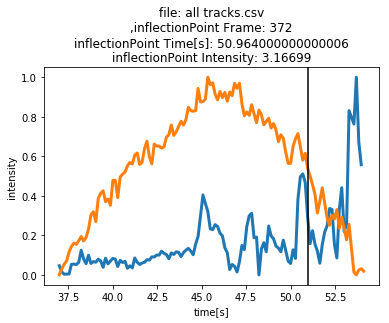

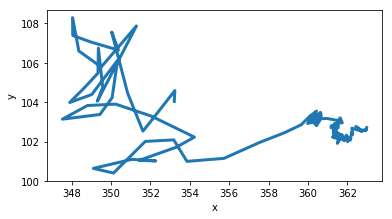

131
            Trajectory  Frame          x          y  z        m0       m1  \
5    27018         533     83  362.92111  102.57340  0   5.76768  2.25636   
6    27019         533     84  362.97897  102.72885  0   5.78893  2.20579   
7    27020         533     85  362.95386  102.59365  0   6.46033  2.24331   
8    27021         533     86  362.69760  102.58450  0   6.67224  2.18293   
9    27022         533     87  362.42377  102.76617  0   6.83966  2.24038   
10   27023         533     88  362.74371  102.51984  0   6.75874  2.19266   
11   27024         533     89  362.22272  102.68543  0   7.36242  2.24482   
12   27025         533     90  362.26697  102.36337  0   7.16157  2.10437   
13   27026         533     91  362.21097  102.48147  0   7.25719  2.20567   
14   27027         533     92  362.14856  102.07964  0   7.73931  2.24104   
15   27028         533     93  362.11365  102.17664  0   7.42291  2.17406   
16   27029         533     94  362.00848  101.99613  0   7.67808  2.2615

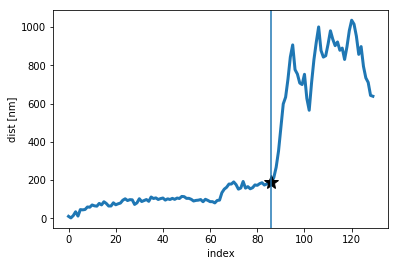

inflectionPoint Frame: 164
inflectionPoint Time[s]: 22.468000000000004
inflectionPoint Intensity: 15.3791


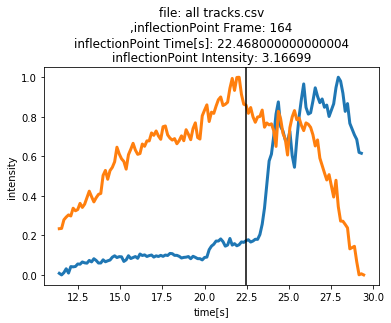

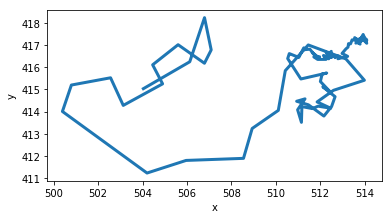

96
            Trajectory  Frame          x          y  z        m0       m1  \
5    46688        1084    197  514.07251  417.22501  0   6.25953  2.14004   
6    46689        1084    198  514.02087  417.24515  0   6.73110  2.27301   
7    46690        1084    199  514.09741  417.21268  0   6.47768  2.11612   
8    46691        1084    200  514.05243  417.27768  0   7.48474  2.17485   
9    46692        1084    201  513.80756  417.27908  0   7.36740  2.28970   
10   46693        1084    202  513.80212  417.14584  0   7.88981  2.24210   
11   46694        1084    203  513.98694  417.27396  0   8.66280  2.17273   
12   46695        1084    204  513.86841  417.34839  0   9.28763  2.20882   
13   46696        1084    205  513.60498  417.08426  0   9.49290  2.16022   
14   46697        1084    206  514.00012  417.31866  0  10.88495  2.15958   
15   46698        1084    207  513.71027  417.08084  0   9.25458  2.27116   
16   46699        1084    208  513.93427  417.47501  0  11.04734  2.23351

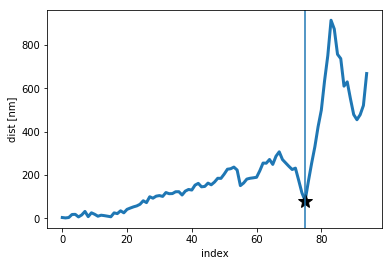

inflectionPoint Frame: 267
inflectionPoint Time[s]: 36.579
inflectionPoint Intensity: 18.74405


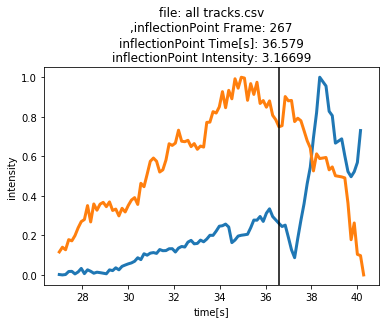

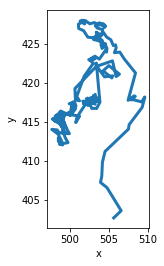

258
            Trajectory  Frame          x          y  z        m0       m1  \
5    23015         447     65  498.13480  415.74002  0   3.71035  2.25061   
6    23016         447     66  498.67670  415.32504  0   3.51062  2.37562   
7    23017         447     67  497.82138  415.36331  0   4.59184  2.25680   
8    23018         447     68  498.50882  415.48227  0   3.78526  2.35596   
9    23019         447     69  498.67374  415.83383  0   4.36330  2.08554   
10   23020         447     70  498.78922  415.76080  0   4.04452  2.33304   
11   23021         447     71  498.97150  415.66730  0   3.59661  2.34257   
12   23022         447     72  498.28061  415.87103  0   3.94062  2.12120   
13   23023         447     73  498.62509  415.36279  0   3.91911  2.13246   
14   23024         447     74  498.53290  415.66602  0   4.69586  2.17388   
15   23025         447     75  498.82925  415.58340  0   5.14757  2.17368   
16   23026         447     76  498.83548  415.68097  0   4.38187  2.3937

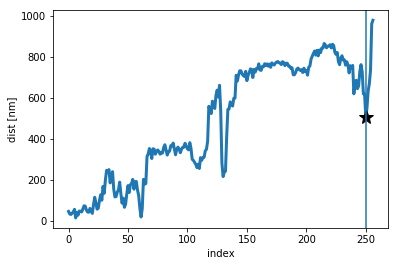

inflectionPoint Frame: 316
inflectionPoint Time[s]: 43.292
inflectionPoint Intensity: 6.95985


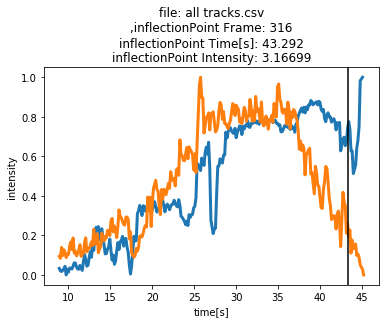

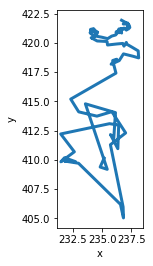

125
            Trajectory  Frame          x          y  z        m0       m1  \
5    10810         164      5  236.65993  421.93961  0   8.14935  2.18462   
6    10811         164      6  237.03108  421.73575  0   8.12139  2.18916   
7    10812         164      7  236.80403  421.61856  0   9.20200  2.16424   
8    10813         164      8  237.11792  421.64917  0   8.95348  2.24212   
9    10814         164      9  237.04170  421.66486  0   9.81394  2.19606   
10   10815         164     10  237.17326  421.70905  0  10.35813  2.19444   
11   10816         164     11  237.20863  421.65549  0  10.55583  2.13744   
12   10817         164     12  237.09271  421.59354  0  11.24854  2.20122   
13   10818         164     13  237.23921  421.51794  0  11.48566  2.17086   
14   10819         164     14  237.21773  421.40036  0  12.92738  2.19181   
15   10820         164     15  237.23184  421.44662  0  12.86450  2.21313   
16   10821         164     16  237.25673  421.58563  0  13.15674  2.2172

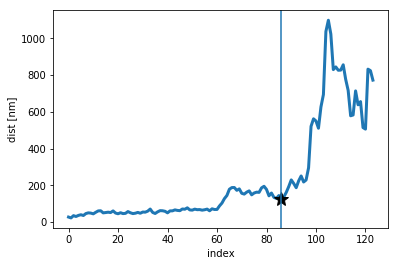

inflectionPoint Frame: 86
inflectionPoint Time[s]: 11.782
inflectionPoint Intensity: 16.21804


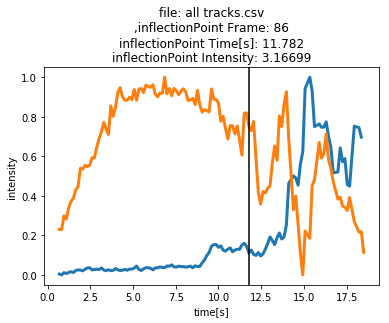

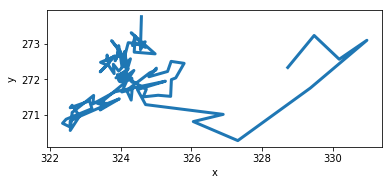

108
            Trajectory  Frame          x          y  z        m0       m1  \
5    82459        2277    394  324.58688  273.77502  0   3.75169  2.17768   
6    82460        2277    395  324.55917  272.84024  0   4.04494  2.01154   
7    82461        2277    396  324.69376  273.06406  0   4.37543  1.91950   
8    82462        2277    397  324.33469  272.95642  0   4.69574  2.15608   
9    82463        2277    398  324.41135  273.22617  0   4.60656  2.16435   
10   82464        2277    399  324.38229  272.77155  0   5.17709  2.13810   
11   82465        2277    400  324.97504  272.72336  0   3.90541  2.12679   
12   82466        2277    401  324.29706  273.32120  0   5.10969  2.23585   
13   82467        2277    402  324.70468  272.90619  0   5.54002  2.08391   
14   82468        2277    403  324.42654  273.01672  0   5.19052  2.07687   
15   82469        2277    404  324.21475  273.03964  0   6.20892  2.09860   
16   82470        2277    405  324.03708  272.36386  0   5.05796  2.1362

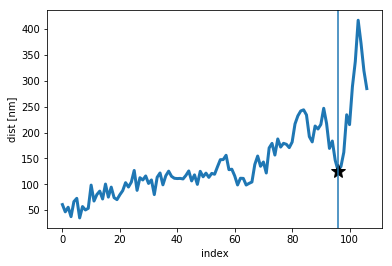

inflectionPoint Frame: 485
inflectionPoint Time[s]: 66.44500000000001
inflectionPoint Intensity: 11.49383


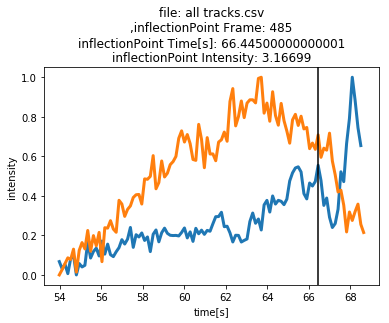

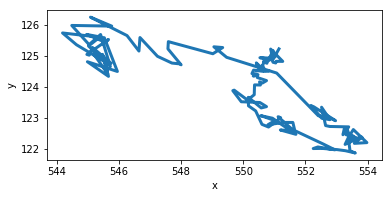

142
            Trajectory  Frame          x          y  z        m0       m1  \
5    33770         718    124  551.14789  125.22443  0   4.36723  2.15414   
6    33771         718    125  550.95581  124.88210  0   5.90688  2.20445   
7    33772         718    126  550.88019  125.21784  0   7.03050  2.19623   
8    33773         718    127  551.27026  124.82143  0   7.14409  2.16656   
9    33774         718    128  551.05505  124.82500  0   8.03183  2.21793   
10   33775         718    129  551.04303  124.77099  0   8.43624  2.22771   
11   33776         718    130  550.95752  124.79366  0   8.67409  2.11624   
12   33777         718    131  550.90002  124.92081  0   8.44979  2.23792   
13   33778         718    132  550.95911  125.16667  0   8.74359  2.23112   
14   33779         718    133  550.79272  124.83276  0   9.43559  2.25579   
15   33780         718    134  551.03406  124.98538  0   9.09827  2.24504   
16   33781         718    135  550.92078  124.92490  0   9.33868  2.2060

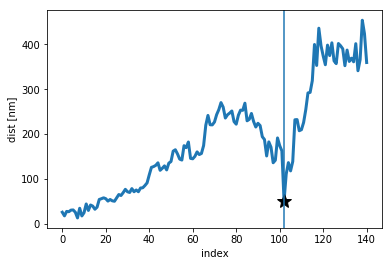

inflectionPoint Frame: 221
inflectionPoint Time[s]: 30.277
inflectionPoint Intensity: 16.444570000000002


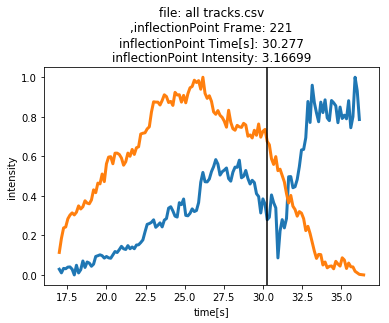

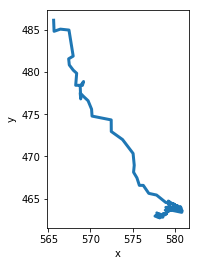

110
            Trajectory  Frame          x          y  z        m0       m1  \
5    36383         780    135  578.00464  462.80399  0   4.82606  2.29324   
6    36384         780    136  577.88007  463.30145  0   5.88933  2.16873   
7    36385         780    137  578.12726  463.11209  0   5.24340  2.37385   
8    36386         780    138  578.10663  463.05164  0   6.30525  2.44911   
9    36387         780    139  577.91882  462.99088  0   6.99035  2.35267   
10   36388         780    140  577.65991  462.91531  0   6.44512  2.27771   
11   36389         780    141  578.17651  463.06467  0   8.22601  2.31712   
12   36390         780    142  578.20935  462.70422  0   7.76555  2.35405   
13   36391         780    143  578.33600  462.96365  0   7.22250  2.38472   
14   36392         780    144  578.19257  463.19308  0   7.67560  2.27293   
15   36393         780    145  578.14014  462.90793  0   8.43087  2.29257   
16   36394         780    146  578.39380  463.05615  0   9.88515  2.2462

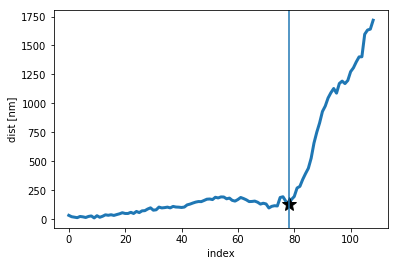

inflectionPoint Frame: 208
inflectionPoint Time[s]: 28.496000000000002
inflectionPoint Intensity: 14.77339


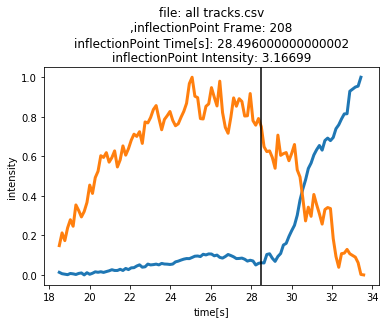

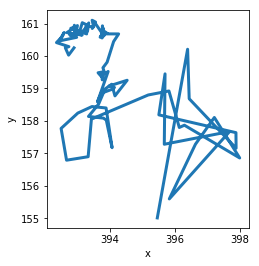

99
            Trajectory  Frame          x          y  z        m0       m1  \
5    39883         893    159  392.89853  160.25064  0   4.43211  2.08223   
6    39884         893    160  392.73218  160.02644  0   4.60013  2.16702   
7    39885         893    161  392.63077  160.25233  0   5.64877  2.01651   
8    39886         893    162  392.74054  160.28809  0   6.51294  2.07726   
9    39887         893    163  392.35840  160.41304  0   6.37079  2.11622   
10   39888         893    164  392.53714  160.59982  0   6.49110  2.01570   
11   39889         893    165  392.59448  160.72444  0   7.42397  2.13969   
12   39890         893    166  392.44223  160.46364  0   8.05617  2.06823   
13   39891         893    167  392.98108  160.57532  0   9.16838  2.11712   
14   39892         893    168  392.76627  160.65071  0   8.58777  2.11134   
15   39893         893    169  392.93259  160.59111  0   9.91771  2.18933   
16   39894         893    170  393.00522  160.93799  0  10.09538  2.20822

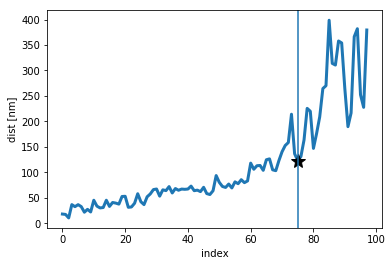

inflectionPoint Frame: 229
inflectionPoint Time[s]: 31.373
inflectionPoint Intensity: 14.918220000000002


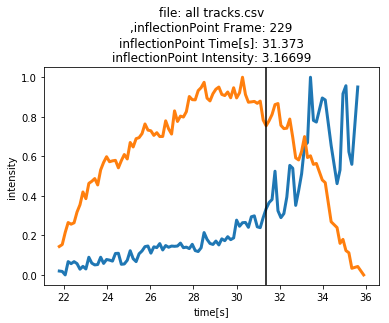

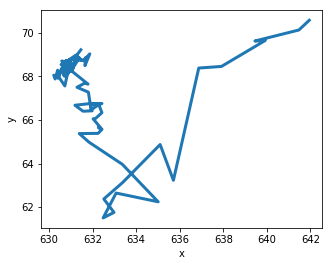

101
            Trajectory  Frame          x         y  z        m0       m1  \
5    71790        1894    332  631.46436  69.21748  0   5.10939  2.11810   
6    71791        1894    333  631.11566  68.75777  0   6.65893  2.15036   
7    71792        1894    334  631.69946  68.72544  0   6.29091  2.06856   
8    71793        1894    335  631.67535  68.85155  0   5.69380  2.09734   
9    71794        1894    336  631.62128  68.72666  0   6.55735  2.06773   
10   71795        1894    337  631.66327  68.64651  0   7.07303  2.02345   
11   71796        1894    338  631.65289  68.49096  0   7.01377  2.11634   
12   71797        1894    339  631.87433  69.03090  0   6.00273  2.19374   
13   71798        1894    340  631.59595  68.74050  0   6.81251  2.17148   
14   71799        1894    341  631.48737  68.74876  0   7.02849  2.22405   
15   71800        1894    342  631.29248  68.92124  0   6.93555  2.07995   
16   71801        1894    343  631.24115  68.97470  0   8.14316  2.15115   
17   718

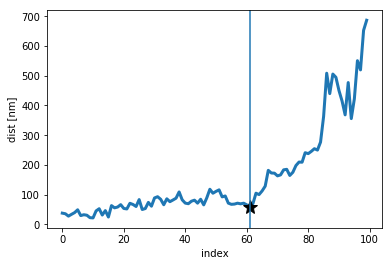

inflectionPoint Frame: 388
inflectionPoint Time[s]: 53.156000000000006
inflectionPoint Intensity: 11.95065


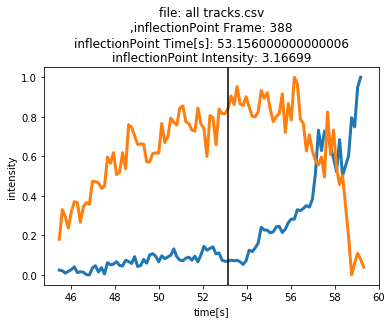

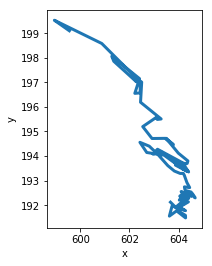

83
           Trajectory  Frame          x          y  z        m0       m1  \
5   59283        1507    268  603.66718  192.12279  0   4.58722  2.04819   
6   59284        1507    269  604.09332  191.69899  0   4.49432  2.19817   
7   59285        1507    270  604.27747  191.58434  0   5.30305  2.05100   
8   59286        1507    271  604.28241  191.48193  0   5.61533  2.12654   
9   59287        1507    272  603.91663  191.76900  0   5.54061  2.17181   
10  59288        1507    273  603.62323  191.55550  0   6.12255  2.15719   
11  59289        1507    274  603.73151  191.96516  0   7.05613  2.24773   
12  59290        1507    275  604.28107  191.77718  0   6.74487  2.18873   
13  59291        1507    276  603.95123  191.97639  0   8.09871  2.25869   
14  59292        1507    277  604.21912  192.20090  0   8.59368  2.11466   
15  59293        1507    278  604.17145  192.02428  0   9.60741  2.28330   
16  59294        1507    279  604.22516  192.22197  0  10.12251  2.23983   
17  59295

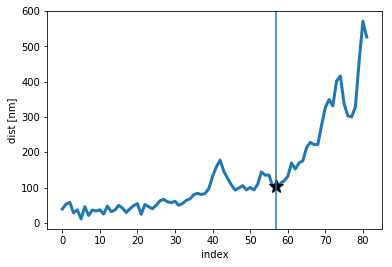

inflectionPoint Frame: 320
inflectionPoint Time[s]: 43.84
inflectionPoint Intensity: 22.879


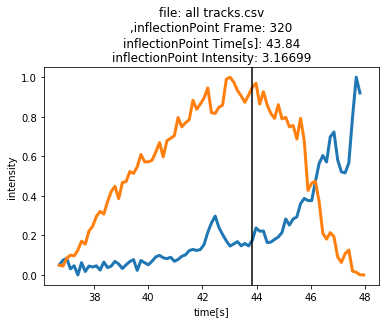

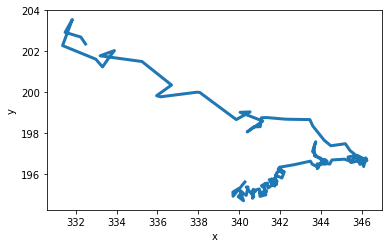

130
            Trajectory  Frame          x          y  z        m0       m1  \
5    43925         994    181  340.27289  195.60606  0   3.19730  2.03532   
6    43926         994    182  339.69528  194.90810  0   3.61648  2.15429   
7    43927         994    183  339.68707  195.11198  0   5.18181  2.10633   
8    43928         994    184  339.94757  195.27379  0   4.18113  2.11539   
9    43929         994    185  340.02505  195.22893  0   4.85221  2.14961   
10   43930         994    186  340.20682  194.68851  0   4.18890  2.16683   
11   43931         994    187  339.94760  194.88638  0   5.69875  2.16707   
12   43932         994    188  340.13290  195.12399  0   5.94464  2.11075   
13   43933         994    189  340.17847  195.05672  0   7.80845  2.20749   
14   43934         994    190  340.34045  194.95078  0   6.34021  2.23884   
15   43935         994    191  340.42651  195.36009  0   6.22961  2.25211   
16   43936         994    192  340.33749  195.35921  0   6.79116  2.1589

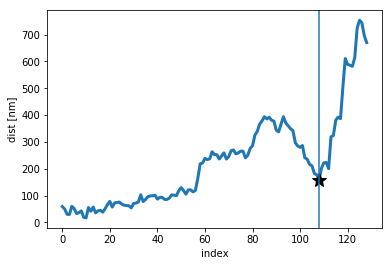

inflectionPoint Frame: 284
inflectionPoint Time[s]: 38.908
inflectionPoint Intensity: 12.786


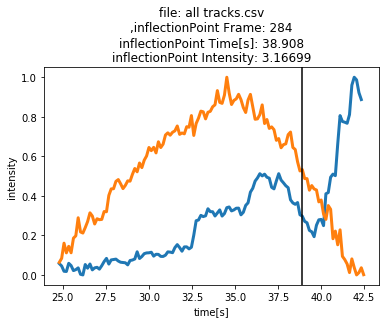

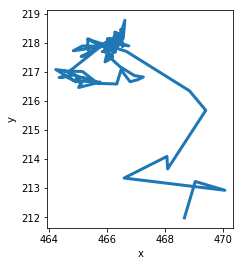

100
            Trajectory  Frame          x          y  z        m0       m1  \
5    67768        1767    310  466.52957  218.27469  0   3.78587  2.05127   
6    67769        1767    311  466.47589  218.46667  0   4.52836  2.30366   
7    67770        1767    312  466.53690  217.86806  0   4.07026  2.18880   
8    67771        1767    313  466.45853  218.25095  0   3.87615  2.13797   
9    67772        1767    314  466.61478  218.77826  0   3.86350  2.26990   
10   67773        1767    315  466.55713  218.14951  0   5.37642  2.21250   
11   67774        1767    316  466.26566  218.37042  0   6.01371  2.20347   
12   67775        1767    317  466.38712  218.32674  0   5.61307  2.23579   
13   67776        1767    318  466.21808  217.72386  0   5.60511  2.32463   
14   67777        1767    319  465.88260  217.87801  0   6.41682  2.27952   
15   67778        1767    320  465.98477  217.91042  0   7.07828  2.14457   
16   67779        1767    321  466.07007  218.05731  0   7.70627  2.2140

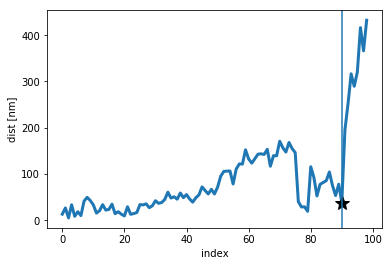

inflectionPoint Frame: 395
inflectionPoint Time[s]: 54.115
inflectionPoint Intensity: 14.06197


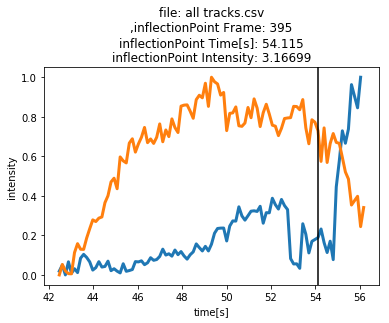

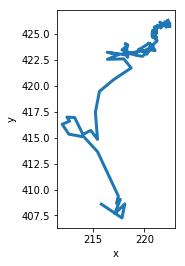

122
            Trajectory  Frame          x          y  z        m0       m1  \
5    13527         223     11  222.27638  426.31873  0   3.73961  2.29379   
6    13528         223     12  222.45354  425.69077  0   4.06577  2.25876   
7    13529         223     13  222.44421  426.04617  0   4.68217  2.29180   
8    13530         223     14  222.06419  425.67032  0   5.46593  2.18096   
9    13531         223     15  222.36342  425.70850  0   5.45423  2.26497   
10   13532         223     16  222.06030  425.90042  0   4.92771  2.30962   
11   13533         223     17  222.35103  426.07202  0   4.48409  2.30342   
12   13534         223     18  221.98129  426.17825  0   4.92132  2.24493   
13   13535         223     19  221.83922  425.82098  0   5.91480  2.25520   
14   13536         223     20  221.81506  425.92487  0   6.03181  2.24610   
15   13537         223     21  221.47806  426.13028  0   6.02843  2.21745   
16   13538         223     22  221.80379  425.82220  0   5.49933  2.2678

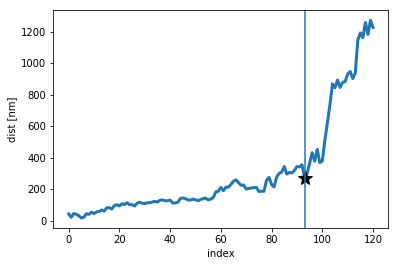

inflectionPoint Frame: 99
inflectionPoint Time[s]: 13.563
inflectionPoint Intensity: 17.93199


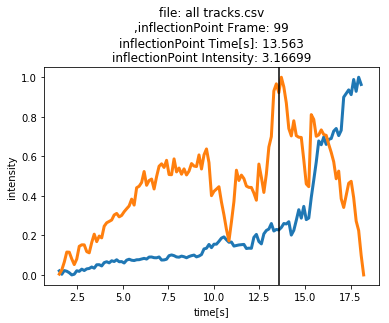

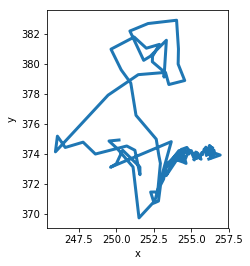

139
            Trajectory  Frame          x          y  z        m0       m1  \
5    51842        1232    222  256.16922  373.63696  0   3.53052  2.08162   
6    51843        1232    223  256.92792  373.90320  0   4.18569  2.06469   
7    51844        1232    224  256.13928  374.18262  0   4.47716  2.27675   
8    51845        1232    225  256.51727  374.02307  0   5.62462  2.17126   
9    51846        1232    226  256.45551  373.98120  0   6.78519  2.29346   
10   51847        1232    227  256.26181  373.69873  0   6.03231  2.18715   
11   51848        1232    228  256.45956  373.84647  0   5.78579  2.18874   
12   51849        1232    229  256.43137  374.01602  0   7.20661  2.31337   
13   51850        1232    230  256.51648  374.21878  0   8.50375  2.13881   
14   51851        1232    231  256.50165  373.97394  0   8.97423  2.13528   
15   51852        1232    232  256.33008  374.24350  0   8.81111  2.23764   
16   51853        1232    233  256.44980  374.18411  0   8.71979  2.1031

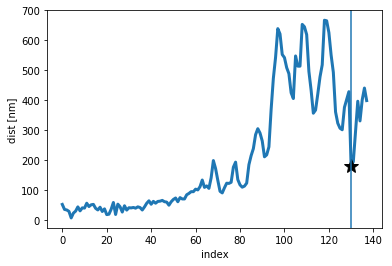

inflectionPoint Frame: 349
inflectionPoint Time[s]: 47.813
inflectionPoint Intensity: 3.9944900000000003


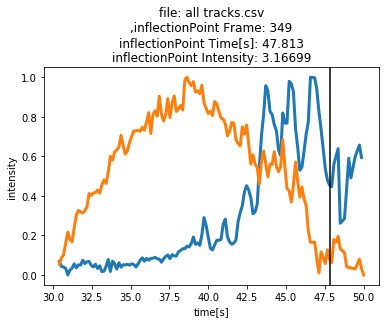

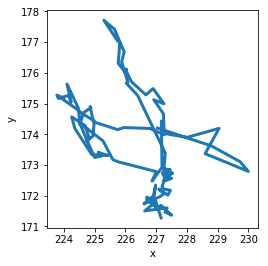

115
            Trajectory  Frame          x          y  z        m0       m1  \
5    67648        1766    311  227.15991  171.27486  0   4.05368  2.08374   
6    67649        1766    312  226.98993  171.80103  0   3.93695  2.16402   
7    67650        1766    313  226.62570  171.50206  0   4.43057  2.01170   
8    67651        1766    314  227.35362  171.60246  0   5.22853  2.05063   
9    67652        1766    315  227.28560  171.46761  0   6.82864  2.13617   
10   67653        1766    316  227.50352  171.36354  0   6.25850  2.44407   
11   67654        1766    317  227.15704  171.68300  0   7.10896  2.11880   
12   67655        1766    318  226.99609  171.55345  0   6.67219  2.13613   
13   67656        1766    319  226.97588  171.84390  0   9.02831  2.13232   
14   67657        1766    320  226.69228  171.94870  0   8.54959  2.12869   
15   67658        1766    321  226.70172  171.82658  0   8.76189  2.13077   
16   67659        1766    322  226.59984  171.73268  0   8.67711  2.1563

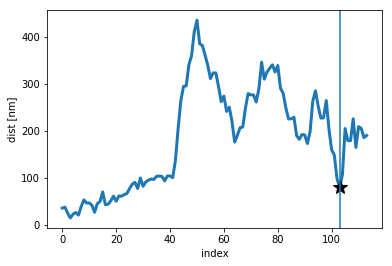

inflectionPoint Frame: 409
inflectionPoint Time[s]: 56.033
inflectionPoint Intensity: 9.733939999999999


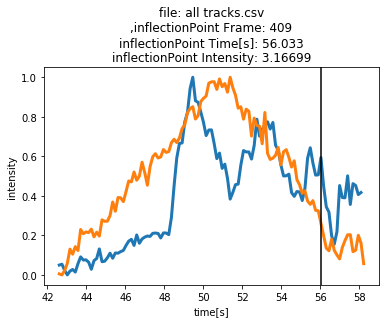

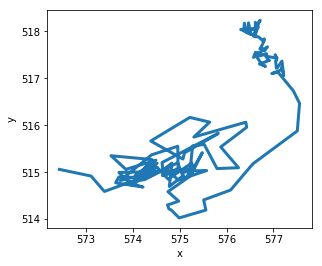

120
            Trajectory  Frame          x          y  z        m0       m1  \
5    22879         444     62  576.46680  518.07434  0   6.86137  2.12227   
6    22880         444     63  576.46735  518.18420  0   6.77841  2.11422   
7    22881         444     64  576.52759  517.93274  0   8.35815  2.17845   
8    22882         444     65  576.42358  517.98285  0   8.66516  2.10163   
9    22883         444     66  576.38171  518.17719  0   9.06062  2.25968   
10   22884         444     67  576.36908  518.05023  0  10.39614  2.21712   
11   22885         444     68  576.63165  518.06207  0   9.42335  2.26828   
12   22886         444     69  576.71771  518.23938  0  10.19990  2.25982   
13   22887         444     70  576.57593  518.03973  0  11.01855  2.26042   
14   22888         444     71  576.30249  518.04327  0  11.41593  2.23349   
15   22889         444     72  576.58618  517.91394  0  12.87673  2.27708   
16   22890         444     73  576.67981  518.09686  0  12.74396  2.2641

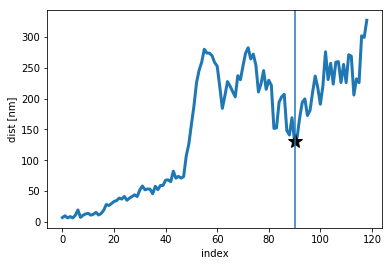

inflectionPoint Frame: 147
inflectionPoint Time[s]: 20.139000000000003
inflectionPoint Intensity: 16.80255


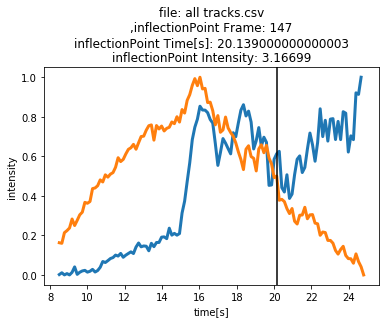

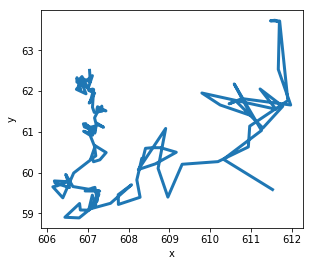

126
            Trajectory  Frame          x         y  z        m0       m1  \
5    20891         405     53  607.04321  62.50817  0   3.84150  2.12504   
6    20892         405     54  607.06244  62.22544  0   4.79784  2.24122   
7    20893         405     55  606.84772  62.31352  0   4.42210  2.10980   
8    20894         405     56  606.80688  62.18588  0   5.74450  2.16592   
9    20895         405     57  606.98694  62.27116  0   6.24584  2.30396   
10   20896         405     58  607.11371  62.37774  0   6.16456  2.19702   
11   20897         405     59  607.00854  62.06792  0   6.65727  2.30566   
12   20898         405     60  606.85712  62.35549  0   6.62823  2.17764   
13   20899         405     61  606.73315  62.22040  0   6.60401  2.16027   
14   20900         405     62  606.73462  62.32800  0   7.30773  2.09002   
15   20901         405     63  606.81403  62.01957  0   8.16564  2.24095   
16   20902         405     64  606.80902  62.15120  0   7.62791  2.20647   
17   209

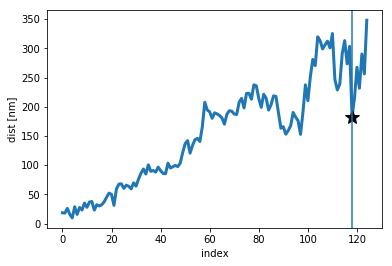

inflectionPoint Frame: 166
inflectionPoint Time[s]: 22.742
inflectionPoint Intensity: 8.52068


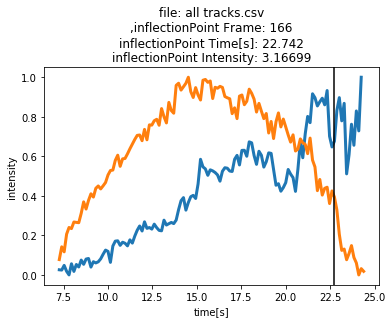

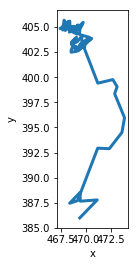

85
           Trajectory  Frame          x          y  z        m0       m1  \
5   31666         662    114  467.61960  404.97858  0   2.33498  2.10597   
6   31667         662    115  467.41458  404.84656  0   3.08105  2.00204   
7   31668         662    116  467.95172  404.84714  0   3.25749  2.05512   
8   31669         662    117  467.81088  405.67020  0   3.77462  2.11153   
9   31670         662    118  467.85443  405.65808  0   3.11404  2.12638   
10  31671         662    119  467.71475  405.10712  0   4.11740  2.21894   
11  31672         662    120  467.67059  404.70029  0   4.50725  2.30532   
12  31673         662    121  467.81839  404.74506  0   4.77159  2.10658   
13  31674         662    122  468.21445  405.55389  0   4.49107  2.14837   
14  31675         662    123  468.16162  405.22543  0   5.66776  2.14956   
15  31676         662    124  468.15683  405.28827  0   5.36473  2.13867   
16  31677         662    125  467.93884  404.65131  0   5.38580  2.31786   
17  31678

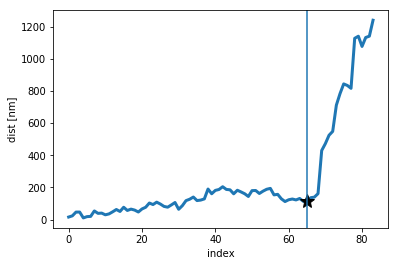

inflectionPoint Frame: 174
inflectionPoint Time[s]: 23.838
inflectionPoint Intensity: 10.85785


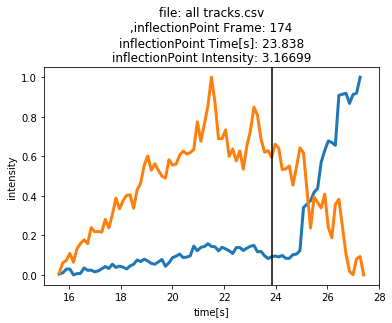

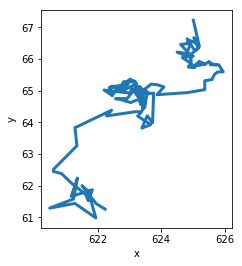

118
            Trajectory  Frame          x         y  z        m0       m1  \
5    29874         623    103  625.01538  67.21850  0   3.00741  2.17480   
6    29875         623    104  625.20380  66.39892  0   4.05177  2.13430   
7    29876         623    105  625.16266  66.33984  0   4.71862  2.14970   
8    29877         623    106  625.03174  66.67186  0   4.20228  2.14428   
9    29878         623    107  625.12463  66.48447  0   4.95191  2.07484   
10   29879         623    108  624.90228  66.57897  0   4.87175  2.07563   
11   29880         623    109  624.84943  66.48515  0   4.56035  2.06116   
12   29881         623    110  624.82037  66.63319  0   5.65537  2.14753   
13   29882         623    111  625.06207  66.25175  0   5.76226  2.10951   
14   29883         623    112  625.18494  66.34971  0   5.53268  2.17369   
15   29884         623    113  624.91730  66.12900  0   6.09213  2.24041   
16   29885         623    114  624.61182  66.45673  0   6.63721  2.14527   
17   298

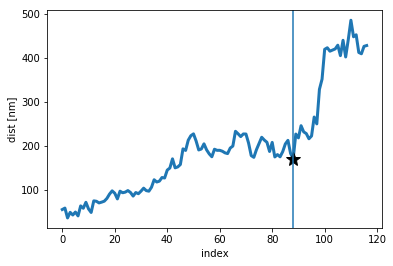

inflectionPoint Frame: 186
inflectionPoint Time[s]: 25.482000000000003
inflectionPoint Intensity: 14.58946


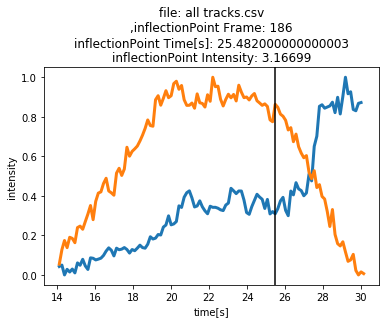

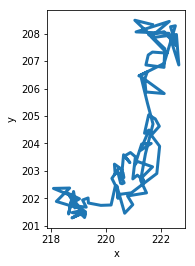

114
            Trajectory  Frame          x          y  z        m0       m1  \
5    43787         988    179  218.76381  201.71902  0   5.26199  2.49695   
6    43788         988    180  218.19667  201.89046  0   4.82820  2.56202   
7    43789         988    181  218.31175  202.00459  0   6.18066  2.32517   
8    43790         988    182  218.68013  202.37804  0   5.28734  2.45635   
9    43791         988    183  218.09169  202.36453  0   5.26786  2.42281   
10   43792         988    184  218.77570  202.08070  0   6.36196  2.45824   
11   43793         988    185  218.64178  201.43315  0   6.29904  2.48580   
12   43794         988    186  218.82323  202.25230  0   6.90708  2.43834   
13   43795         988    187  218.91814  201.68393  0   7.78101  2.46566   
14   43796         988    188  218.61722  202.19051  0   7.24468  2.38912   
15   43797         988    189  219.03860  201.98703  0   7.49615  2.54070   
16   43798         988    190  218.70853  201.78760  0   7.99640  2.3863

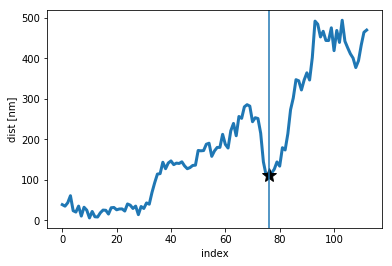

inflectionPoint Frame: 250
inflectionPoint Time[s]: 34.25
inflectionPoint Intensity: 12.3206


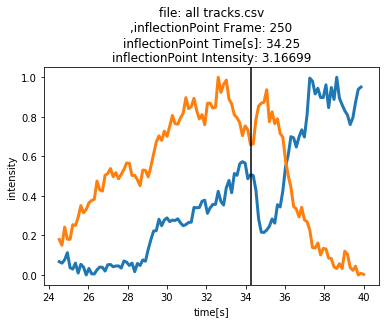

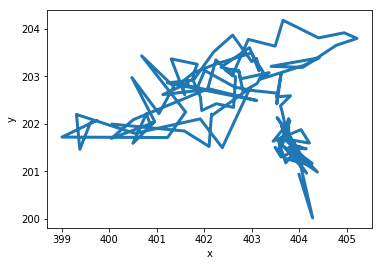

128
            Trajectory  Frame          x          y  z        m0       m1  \
5    83632        2317    400  403.99274  200.93404  0   3.66236  2.27216   
6    83633        2317    401  404.27756  200.01942  0   3.34503  2.38339   
7    83634        2317    402  403.95117  201.44928  0   2.93771  2.37442   
8    83635        2317    403  403.61374  201.30038  0   4.28670  2.35926   
9    83636        2317    404  403.48892  201.50403  0   3.81194  2.29013   
10   83637        2317    405  403.70908  201.26949  0   3.76522  2.39896   
11   83638        2317    406  404.24994  201.11728  0   4.23608  2.32667   
12   83639        2317    407  403.66113  201.52873  0   4.96804  2.25143   
13   83640        2317    408  404.15189  200.95988  0   4.75610  2.47889   
14   83641        2317    409  403.78046  201.50443  0   6.54698  2.16594   
15   83642        2317    410  403.90274  201.44337  0   5.83056  2.47683   
16   83643        2317    411  404.26843  201.16733  0   6.63994  2.3488

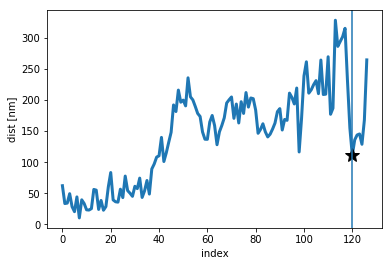

inflectionPoint Frame: 515
inflectionPoint Time[s]: 70.555
inflectionPoint Intensity: 4.65339


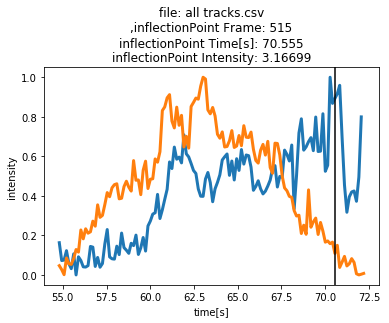

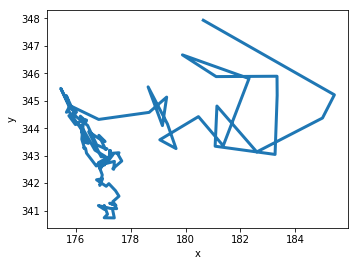

111
            Trajectory  Frame          x          y  z        m0       m1  \
5    13082         212      8  177.35159  340.98181  0   3.99801  2.35835   
6    13083         212      9  177.40308  340.73083  0   4.20945  2.31843   
7    13084         212     10  177.03502  340.73654  0   4.73746  2.35820   
8    13085         212     11  177.15619  340.86526  0   4.83585  2.26592   
9    13086         212     12  177.03596  341.18539  0   5.37101  2.32972   
10   13087         212     13  177.03760  341.04257  0   5.19871  2.45402   
11   13088         212     14  176.82370  341.18158  0   5.55900  2.36885   
12   13089         212     15  177.25478  341.07678  0   6.12587  2.38229   
13   13090         212     16  177.48927  341.06796  0   6.28592  2.29245   
14   13091         212     17  177.40765  341.20847  0   6.93085  2.32605   
15   13092         212     18  177.23335  341.26733  0   6.86000  2.40743   
16   13093         212     19  177.46284  341.18423  0   7.49948  2.5416

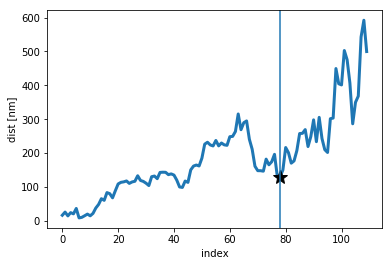

inflectionPoint Frame: 81
inflectionPoint Time[s]: 11.097000000000001
inflectionPoint Intensity: 18.3119


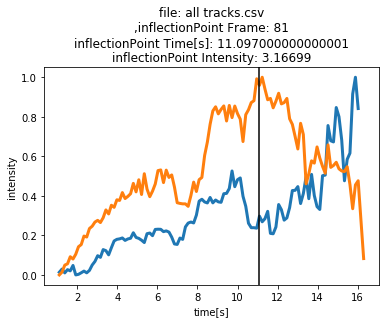

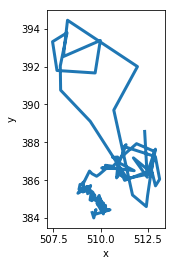

120
            Trajectory  Frame          x          y  z        m0       m1  \
5    58099        1469    262  509.55325  384.29074  0   3.83443  2.03188   
6    58100        1469    263  509.63828  384.00848  0   4.66039  2.11059   
7    58101        1469    264  509.75247  384.45029  0   5.59442  2.11230   
8    58102        1469    265  509.68243  384.19269  0   6.18444  2.09808   
9    58103        1469    266  510.49515  384.43634  0   5.45535  2.24319   
10   58104        1469    267  510.18460  384.45441  0   5.65529  2.17598   
11   58105        1469    268  510.26706  384.44266  0   6.08427  2.06044   
12   58106        1469    269  510.25519  384.67276  0   5.71422  1.93486   
13   58107        1469    270  510.05112  384.35007  0   7.10901  2.12258   
14   58108        1469    271  510.21558  384.35217  0   6.61164  2.01454   
15   58109        1469    272  510.13675  384.80069  0   6.22524  2.16533   
16   58110        1469    273  510.24445  384.44858  0   8.07002  1.9586

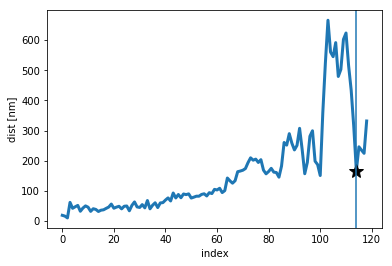

inflectionPoint Frame: 373
inflectionPoint Time[s]: 51.101000000000006
inflectionPoint Intensity: 5.27615


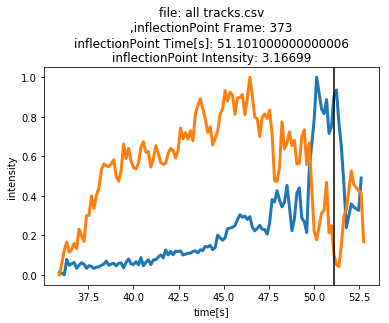

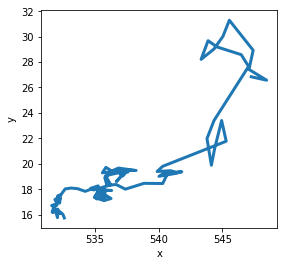

138
            Trajectory  Frame          x         y  z        m0       m1  \
5    27696         550     86  532.57458  15.73773  0   4.55957  2.21459   
6    27697         550     87  532.45752  16.02467  0   4.71371  2.32991   
7    27698         550     88  532.12384  16.29238  0   5.83634  2.24439   
8    27699         550     89  532.13245  16.18645  0   5.35974  2.14588   
9    27700         550     90  532.07697  16.31016  0   5.91969  2.35739   
10   27701         550     91  532.30170  16.08414  0   5.98870  2.32904   
11   27702         550     92  531.69415  16.26416  0   6.15620  2.11603   
12   27703         550     93  532.06519  16.42758  0   6.78457  2.34173   
13   27704         550     94  532.03564  15.75964  0   6.79760  2.30380   
14   27705         550     95  531.85352  16.39263  0   7.53780  2.40113   
15   27706         550     96  531.92950  16.23549  0   7.90247  2.37236   
16   27707         550     97  531.70740  16.59802  0   8.01672  2.34238   
17   277

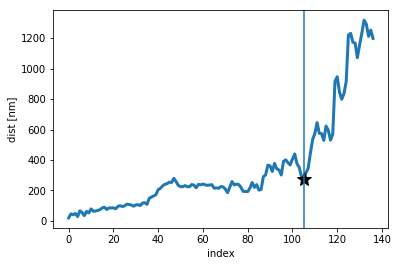

inflectionPoint Frame: 186
inflectionPoint Time[s]: 25.482000000000003
inflectionPoint Intensity: 16.31007


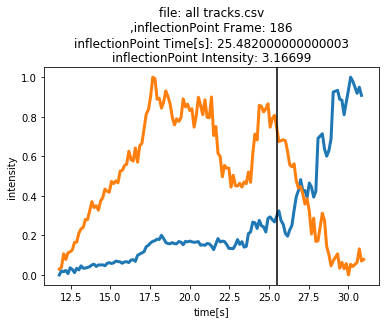

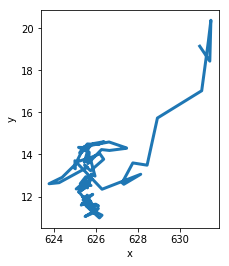

121
            Trajectory  Frame          x         y  z        m0       m1  \
5    75637        2033    359  625.99695  11.27312  0   4.10286  2.28004   
6    75638        2033    360  625.49548  11.05493  0   4.57773  2.27304   
7    75639        2033    361  626.12561  11.43080  0   5.11981  2.12176   
8    75640        2033    362  625.88013  11.25511  0   6.10048  2.16068   
9    75641        2033    363  626.17603  10.98562  0   5.14533  2.18411   
10   75642        2033    364  626.29944  11.11352  0   4.99122  2.21795   
11   75643        2033    365  625.67731  11.42564  0   5.86491  2.10456   
12   75644        2033    366  626.03009  11.31841  0   6.70877  2.20720   
13   75645        2033    367  625.96893  11.34777  0   5.71041  2.36824   
14   75646        2033    368  625.56177  11.53238  0   5.95343  2.07477   
15   75647        2033    369  626.06781  11.21901  0   6.16639  2.28184   
16   75648        2033    370  625.72601  11.51057  0   7.57290  2.15989   
17   756

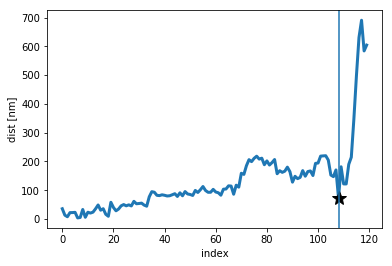

inflectionPoint Frame: 462
inflectionPoint Time[s]: 63.294000000000004
inflectionPoint Intensity: 9.3854


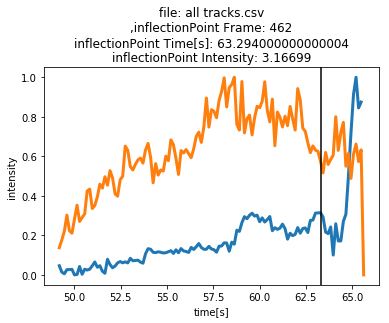

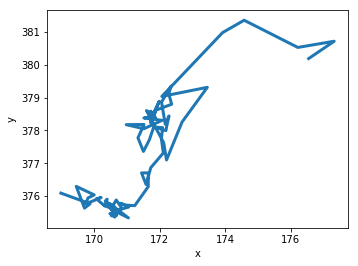

89
           Trajectory  Frame          x          y  z        m0       m1  \
5   22244         435     60  168.98779  376.08875  0   4.52290  2.31273   
6   22245         435     61  169.88046  375.76318  0   5.25656  2.39222   
7   22246         435     62  169.70818  375.63089  0   6.25865  2.19248   
8   22247         435     63  169.45732  376.29422  0   5.92354  2.23884   
9   22248         435     64  170.00499  376.03433  0   6.45960  2.39249   
10  22249         435     65  169.81416  375.94135  0   7.61602  2.31260   
11  22250         435     66  169.75114  375.76282  0   7.59561  2.25773   
12  22251         435     67  170.17787  375.93616  0   8.49047  2.32131   
13  22252         435     68  170.21625  375.95493  0   8.31019  2.30696   
14  22253         435     69  170.06960  375.91522  0   8.89707  2.36019   
15  22254         435     70  170.33347  375.69080  0   9.51250  2.22241   
16  22255         435     71  170.39961  375.90387  0   9.85170  2.31432   
17  22256

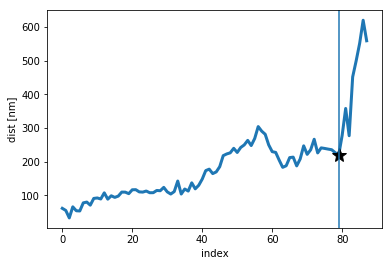

inflectionPoint Frame: 134
inflectionPoint Time[s]: 18.358
inflectionPoint Intensity: 12.87266


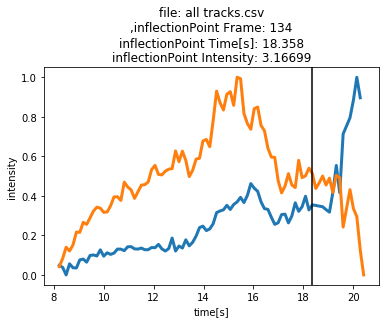

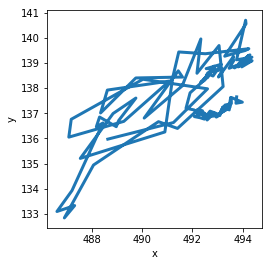

126
            Trajectory  Frame          x          y  z        m0       m1  \
5    19423         360     43  493.75980  137.65312  0   5.24058  2.32654   
6    19424         360     44  493.73294  137.39951  0   5.58837  2.29880   
7    19425         360     45  493.98599  137.44200  0   5.96762  2.42292   
8    19426         360     46  493.65359  137.58458  0   6.59375  2.31068   
9    19427         360     47  493.54385  137.62994  0   6.01047  2.38174   
10   19428         360     48  493.55063  137.38611  0   6.71194  2.33985   
11   19429         360     49  493.29391  137.32524  0   6.76922  2.27226   
12   19430         360     50  493.46533  137.13293  0   7.79802  2.30762   
13   19431         360     51  493.51929  137.62495  0   7.87743  2.27398   
14   19432         360     52  493.49677  137.23918  0   7.67409  2.33480   
15   19433         360     53  493.21890  137.19658  0   7.50685  2.31818   
16   19434         360     54  493.47128  137.21730  0   8.18865  2.3929

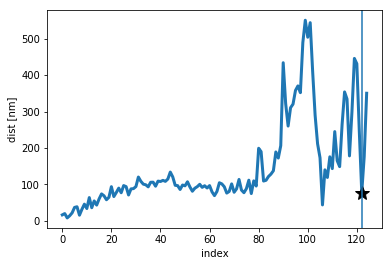

inflectionPoint Frame: 162
inflectionPoint Time[s]: 22.194000000000003
inflectionPoint Intensity: 3.16699


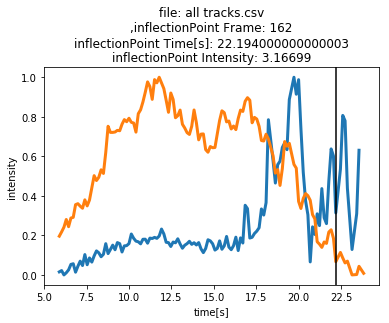

In [11]:
for trajectoryID in goodTrajectoryIDs:
    
    data = alldata[alldata['Trajectory']==trajectoryID]
    
    data = data.reset_index(drop=True)
    data = data[excludeTheFirstNFrames:]

    
        
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    
    
    # calc distances from start

    
    time = frameToSecondConversion*data['Frame']
    distancesFromStart = []
    for i in range(1,len(data)):
        v0 = np.array([x[0],y[0]])
        v1 = np.array([x[i],y[i]])
        dist = np.linalg.norm(v0-v1)
        distancesFromStart.append(dist)
    distancesFromStart = pixelToNanometerConversion* np.array(distancesFromStart)
    
    # plot xy
    
    plt.plot(x,y,lw=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(outputpath+file+'_'+str(trajectoryID)+'_traj_xy.png')
    plt.show()
    
    
    # find inflection point from distances 
    
    x=np.arange(0,len(distancesFromStart))
    y=distancesFromStart
    
    
    print(len(data))
    print(data)
    inflectionPointIndex = ytf.findInflectionPoint(x,y)
    print("inflectionPointIndex: {}".format(inflectionPointIndex))
    print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
    print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))
    
    
    #plt.plot(x, newy, 'o', label='original data',color='b')
    plt.plot(distancesFromStart,lw=3)
    plt.plot(x[inflectionPointIndex],y[inflectionPointIndex], 'k*',markersize=15)
    plt.axvline(x[inflectionPointIndex])
    
    plt.xlabel('index')
    plt.ylabel('dist [nm]')
    plt.savefig(outputpath+file+'_'+str(trajectoryID)+'_inflectionPoint.png')
    plt.show()
    
    
    # plot dista and intensity at the same time:
    
    plt.plot(time[0:-1],(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
    #plt.title('distance from start')
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm]')
    #plt.savefig(file+'_distToStart.png')
    
    
    plt.plot(time,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
    plt.xlabel('time[s]')
    plt.ylabel('intensity')
    
    plt.axvline(time[0:-1][inflectionPointIndex],c='k')
    inflectionPointFrame = data['Frame'][inflectionPointIndex]
    inflectionPointTime = frameToSecondConversion*(data['Frame'][inflectionPointIndex])
    inflectionPointIntensity = data['m0'][inflectionPointIndex]
    
    print("inflectionPoint Frame: {}".format(inflectionPointFrame))
    print("inflectionPoint Time[s]: {}".format(inflectionPointTime))
    print("inflectionPoint Intensity: {}".format(inflectionPointIntensity))
    
    plt.title("file: {}\n,inflectionPoint Frame: {}\ninflectionPoint Time[s]: {}\ninflectionPoint Intensity: {}".format(file,inflectionPointFrame,inflectionPointTime,inflexctionPointIntensity))
    
    plt.savefig(outputpath+file+'_'+str(trajectoryID)+'_intensity+distance.png')
    plt.show()
    
    
    # export as excels
    
    data['time[s]']=time
    data['time aligned [s]']=time-inflectionPointTime
    distanceForExport = np.concatenate((np.array([0]),distancesFromStart))
    data['distance']=distanceForExport
    data['max_intensity_AU'] = np.max(intensity)
    data['alignment_frame_Id'] = inflectionPointFrame
    data['alignment_time_seconds'] = inflectionPointTime
    data['alignment_intensity_AU']= inflectionPointIntensity
    normDistanceForExport = np.concatenate((np.array([0]),(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart))))
    data['distance normalized']= normDistanceForExport
    data.to_csv(outputpath+file+'_'+str(trajectoryID)+'_processed.csv')
    
    # export the learned parameters
    data